In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# load images
imagesMatrix = np.zeros((2400,784))
for i in range (0,2400): 
    img = Image.open("Images/%d.jpg"%(i+1))
    imagesMatrix[i] = np.array(img).reshape(-1)
imagesMatrix = np.where(imagesMatrix >= 140, 1, 0)

In [2]:
def GetMembership(currentAverages):
    membership = np.zeros((2400), dtype="int")
    for i in range (0,2400):
        currentAverage = 0
        currentDistance = np.linalg.norm(imagesMatrix[i]-currentAverages[0])
        for j in range (0,10):
            tempDistance = np.linalg.norm(imagesMatrix[i]-currentAverages[j])
            if tempDistance <= currentDistance:
                currentDistance= tempDistance
                currentAverage = j
        membership[i]= currentAverage
    return membership

In [3]:
def GetIndices(membershipList,k):
    indices = []
    for index in range(0,len(membershipList)):
        if membershipList[index] == k:
            indices.append(index)
    return indices
    

In [4]:
memberships = [] # memberships for all 30 iterations
# repeat for 30 iterations
for itr in range(0,30):    
    # intialize 10 matrices (mus)
    centriods = np.zeros(10, dtype="int")
    currentImageIndex = np.random.randint(0,2400)
    centriods[0] = currentImageIndex
    for k in range (1,10):
        # first minimum distance
        currentDistance = np.linalg.norm(imagesMatrix[currentImageIndex]-imagesMatrix[0])
        for i in range (0,2400):
            # check if this image index wasn't used before
            if not (np.any(np.isin(i,centriods))):
                tempDistance = np.linalg.norm(imagesMatrix[currentImageIndex]-imagesMatrix[i])
                # if the ditance is farthest away then update the centriods
                if tempDistance >= currentDistance:
                    currentDistance= tempDistance
                    centriods[k] = i
        currentImageIndex = centriods[k]
    
    # get averages (mus) based on the 10 indices 
    averages = np.zeros((10,784), dtype="float")
    for i in range (0,10):
        averages[i]= imagesMatrix[centriods[i]]

    # update averages until it converges
    oldAverages = np.zeros((10,784), dtype="float")
    membership = GetMembership(averages)
    for k in range(0,10):
        oldAverages[k]=np.mean(imagesMatrix[GetIndices(membership,k)], axis =0 )
    while True:
        membership = GetMembership(oldAverages)
        newAverages = np.zeros((10,784), dtype="float")
        for k in range(0,10):
            newAverages[k]=np.mean(imagesMatrix[GetIndices(membership,k)], axis =0 )
        if (newAverages==oldAverages).all():
            break
        oldAverages = newAverages
    memberships.append(membership)

In [5]:
distances = []
for itr in range(0,30):
    totalDistance=0
    membership = memberships[itr]
    for k in range(0,10):
        for img in range(0,2400):
            if((k==membership[img])):
                for restimg in range(0,2400):
                    if( (k==membership[restimg])):
                        totalDistance +=np.linalg.norm(imagesMatrix[img]-imagesMatrix[restimg])
    distances.append(totalDistance)

The accuracy for point 0 is 69.58333333333333 %
The accuracy for point 1 is 98.75 %
The accuracy for point 2 is 56.666666666666664 %
The accuracy for point 3 is 40.416666666666664 %
The accuracy for point 4 is 48.75 %
The accuracy for point 5 is 29.583333333333332 %
The accuracy for point 6 is 81.25 %
The accuracy for point 7 is 58.333333333333336 %
The accuracy for point 8 is 55.00000000000001 %
The accuracy for point 9 is 48.75 %


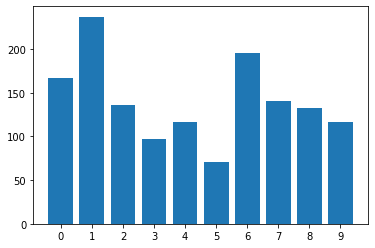

In [6]:
# get the memeberships of the minimum distance
indexMembership =memberships[ distances.index(min(distances))]
finalClusters = np.zeros((10))
for value in range(0,10):
    classifiedPoints=0
    currentSummation= 0
    startIndex= 240 * (value)
    endIndex= 240 * (value+1)
    counts = np.bincount(indexMembership[ range(startIndex,endIndex)])
    # gets the most frequent count images of the current cluster
    mostFrequentValue = np.argmax(counts)
    classifiedPoints+=counts[mostFrequentValue]
    finalClusters[value] =counts[mostFrequentValue]
    accuracy = (classifiedPoints/240) *100
    print("The accuracy for point", value , "is", accuracy , "%")

bars = ('0','1', '2', '3', '4', '5','6','7','8','9')
y_pos = np.arange(len(bars))
plt.bar(y_pos, finalClusters) 
plt.xticks(y_pos, bars)
plt.savefig("Counts.jpg")
plt.show()

